# Lasso Penalized Logistic Regression

## Lasso penalization principle
Consists in finding the coef that minimizes the expression :

$$  
-2\sum^n_{i=1}~\Bigg[y^i~log\Bigg(\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg) + (1-y^i)~log\Bigg(1-\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg)\Bigg]+\lambda\sum^p_{j=1}\beta^2_j
$$

$ \lambda $   being a penalization parameter > 0

it is equivalent to seeking to minimize:

$$
-2\sum^n_{i=1}~\Bigg[y^i~log\Bigg(\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg) + (1-y^i)~log\Bigg(1-\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg)\Bigg]
$$

The lasso is a popular method of variable selection, especially when the number p of variables is very large. Indeed, it should be noted that when p is very large, a good generalization of the model requires an increasingly strong penalization to reduce its complexity. 

This is the interest of the compromise between lasso and ridge regression, proposed in 2005 under the name of “elastic net”, in which the penalization is of the form

$$ \lambda\Bigg[(1-\alpha)\sum_j\beta^2_j+\alpha\sum_j|\beta_j|\Bigg]$$

with $\alpha$ varying between 0 (ridge model) and 1 (lasso model).

In [104]:
import pandas as pd

credit2 = pd.read_csv('credit2.csv') 

test_size = 0.3

shuffled_data = credit2.sample(frac=1, random_state=42)

split_point = int(len(shuffled_data) * (1 - test_size))

train = shuffled_data.iloc[:split_point].reset_index().rename(columns={'index': 'id'})
test = shuffled_data.iloc[split_point:].reset_index().rename(columns={'index': 'id'})

In [105]:
credit2.reset_index(drop=True).rename(columns={'index': 'id'})

,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit,presence_unpaid
0,CC < 0 euros,A34,Video-HIFI,No savings,for at least 4 years,4,Male single/married/widowed,Without guarantor,4,Property,No external credit,owner,2,A173,1,A192,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
1,CC [0-200 euros],A32,Video-HIFI,< 500 euros,between 1 and 4 years,2,Female divorced/separated/married,Without guarantor,2,Property,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[36.0, inf)","[4000.0, inf)",1
2,No account,A34,Studies,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,3,Property,No external credit,owner,1,A172,2,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
3,CC < 0 euros,A32,Interior,< 500 euros,for at least 4 years,2,Male single/married/widowed,With guarantor,4,Not real estate,No external credit,Not owner,1,A173,2,A191,"[25.0, inf)","[36.0, inf)","[4000.0, inf)",0
4,CC < 0 euros,A33,New car,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,No property,No external credit,Not owner,2,A173,2,A191,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No account,A32,Interior,< 500 euros,for at least 4 years,3,Female divorced/separated/married,Without guarantor,4,Property,No external credit,owner,1,A172,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
996,CC < 0 euros,A32,Used car,< 500 euros,between 1 and 4 years,4,Male divorced/separated,Without guarantor,4,Not real estate,No external credit,owner,1,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
997,No account,A32,Video-HIFI,< 500 euros,for at least 4 years,4,Male single/married/widowed,Without guarantor,4,Non-property,No external credit,owner,1,A173,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
998,CC < 0 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,4,Male single/married/widowed,Without guarantor,4,No property,No external credit,Not owner,1,A173,1,A192,"[0.0, 25.0)","[36.0, inf)","[0.0, 4000.0)",1


In [88]:
train.head(1000)

,id,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,...,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit,presence_unpaid
0,521,CC < 0 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,2,Female divorced/separated/married,Without guarantor,2,...,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[15.0, 36.0)","[0.0, 4000.0)",1
1,737,CC < 0 euros,A32,New car,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,...,No external credit,owner,1,A172,2,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
2,740,CC < 0 euros,A31,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,3,...,External credits,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
3,660,CC > 200 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,...,No external credit,Not owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",0
4,411,No account,A34,Used car,< 500 euros,for at least 4 years,3,Male single/married/widowed,Without guarantor,2,...,No external credit,owner,2,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,262,CC < 0 euros,A34,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,4,...,No external credit,Not owner,3,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
696,610,CC < 0 euros,A32,Interior,< 500 euros,Unemployed or < 1 year,4,Female divorced/separated/married,Without guarantor,3,...,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",1
697,297,No account,A32,New car,No savings,for at least 4 years,4,Male single/married/widowed,Without guarantor,2,...,No external credit,owner,1,A172,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
698,414,CC < 0 euros,A32,New car,No savings,between 1 and 4 years,4,Female divorced/separated/married,Without guarantor,2,...,No external credit,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",1


In [4]:
# Create a design matrix with one-hot encoding for categorical variables (like R's model.matrix without intercept)
x = pd.get_dummies(train.drop("presence_unpaid", axis=1), drop_first=False)

# Convert the target variable to numeric
y = pd.to_numeric(train["presence_unpaid"])

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV

np.random.seed(235)

# x should be a numpy array of features and y the target variable.
# They must be defined in a previous cell.
model = LogisticRegressionCV(
    Cs=100,             # generate 100 candidate values for C
    cv=5,
    penalty='l1',
    solver='liblinear', # l1 penalty requires a compatible solver
    scoring='roc_auc',  # use AUC as the scoring metric
    max_iter=10000,
)
model.fit(x, y)

# In scikit-learn, the candidate regularization strengths are Cs (with larger values = less penalty).
# Note that lambda in cv.glmnet corresponds to 1 / C.
candidate_Cs = model.Cs_
lambdas = 1 / candidate_Cs

# cv.glmnet returns lambda in decreasing order, so the first lambda is the maximum.
print(lambdas[0])

10000.0


In [9]:
print(len(lambdas))

100


In [10]:
# Compute lambda.min as the inverse of the best C chosen by LogisticRegressionCV
lambda_min = 1 / model.C_[0]
print("lambda.min =", lambda_min)

lambda.min = 4.862601580065348


In [11]:
indices = np.where(np.isclose(lambdas, lambda_min))[0]
print(indices)

[41]


In [12]:
# Compute the mean cross-validation score for each candidate C (for the positive class)
cvm = np.mean(model.scores_[1], axis=0)

# Find the index where the lambda equals lambda_min (using np.isclose for floating point comparison)
index = np.where(np.isclose(lambdas, lambda_min))[0]

# Print the corresponding cross-validation score(s)
print("CV score at lambda_min:", cvm[index])

CV score at lambda_min: [0.75686377]


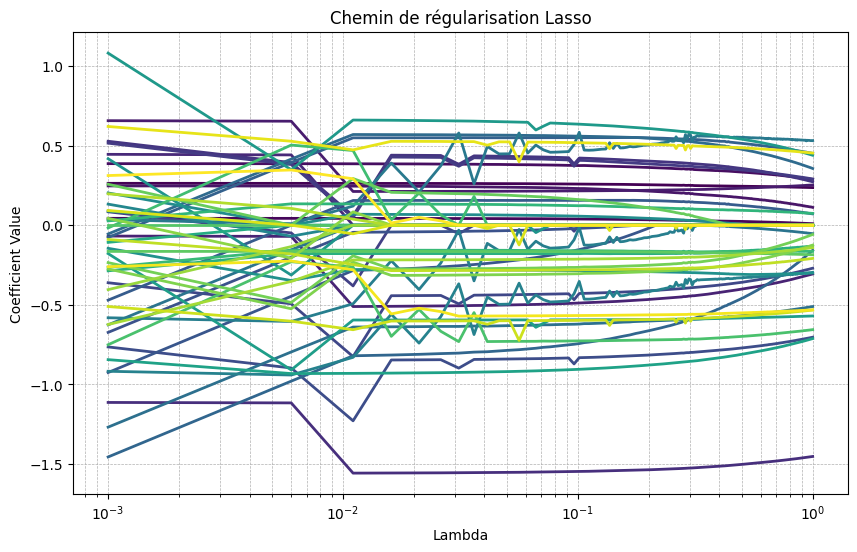

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

"""
THEORIE MATHEMATIQUE :
La régression logistique pénalisée Lasso combine :
1. Modèle de régression logistique : Prédit la probabilité P(y=1|x) via une fonction logistique :
   P(y=1|x) = 1 / (1 + exp(-(β₀ + β₁x₁ + ... + βₚxₚ)))
   où β sont les coefficients à estimer

2. Pénalisation L1 (Lasso) : Ajout d'un terme de régularisation λΣ|βⱼ| à la log-vraisemblance :
   Loss = -log-vraisemblance + λ||β||₁
   Cela permet :
   - De contrôler le surapprentissage (biais-variance)
   - De sélectionner automatiquement les variables (certains βⱼ → 0)
   - De gérer la multicolinéarité

λ hyperparamètre de régularisation :
- λ → 0 : modèle non contraint (risque de sur-apprentissage)
- λ → ∞ : tous les coefficients tendent vers 0
"""

# Préparation des paramètres de régularisation
lambda_max = 1.0    # Régularisation maximale (contrainte forte)
lambda_min = 0.001  # Régularisation minimale (contrainte faible)
num_lambdas = 200   # Nombre de valeurs intermédiaires

# Génération d'une séquence logarithmique de λ 
# (Conversion en C=1/λ car scikit-learn utilise C=1/λ comme hyperparamètre)
lambda_seq = np.linspace(lambda_max, lambda_min, num=num_lambdas)
C_seq = 1.0 / lambda_seq  # C est l'inverse de la force de régularisation

# Stockage des coefficients pour analyse des chemins de régularisation
coefs_list = []

# Apprentissage pour chaque valeur de régularisation
for C in C_seq:
    # Initialisation du modèle avec pénalité L1
    # solver='liblinear' nécessaire pour la pénalité L1
    # C = 1/(λ) → petit C = forte régularisation
    clf = LogisticRegression(
        penalty='l1', 
        solver='liblinear', 
        C=C,
        fit_intercept=True,
        max_iter=10000  # Convergence nécessaire pour forte régularisation
    )
    
    # Estimation des coefficients par maximum de vraisemblance pénalisé
    clf.fit(x, y)
    
    # Récupération des coefficients (exclut l'intercept)
    coefs_list.append(clf.coef_[0])

# Préparation des données pour visualisation
coefs = np.array(coefs_list).T  # Matrice (n_features, num_lambdas)

# Visualisation des chemins de régularisation
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, coefs.shape[0]))

for i in range(coefs.shape[0]):
    label = f'Coefficient {i}' if coefs.shape[0] < 10 else None
    plt.plot(lambda_seq, coefs[i, :], lw=2, color=colors[i], label=label)

"""
INTERPRETATION STATISTIQUE :
- Axe x : Log(λ) montre l'effet de la force de régularisation
- Axe y : Valeur des coefficients βⱼ
- Quand λ augmente (→ gauche) :
  * Les coefficients non importants tendent vers 0 (sélection de variables)
  * Seules les variables les plus prédictives gardent un β ≠ 0
- Le point optimal est souvent choisi par validation croisée (λ qui maximise l'AUC)
"""
plt.xlabel('λ (Force de régularisation)')
plt.ylabel('Valeur des coefficients')
plt.title('Chemins de régularisation Lasso')
plt.xscale('log')  # Échelle log pour mieux voir les variations
plt.grid(True, which="both", ls="--", lw=0.5)

if coefs.shape[0] < 10:
    plt.legend(loc='best', title='Variables')

plt.show()


In [20]:
# Get the intercept and coefficients corresponding to lambda_min
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.]
Coefficients: [[ 0.16629595  0.          0.01481756  0.          0.26793448  0.
   0.         -1.27253001  0.          0.          0.          0.
  -0.3514052   0.          0.          0.          0.17509235  0.
   0.         -0.14295917 -0.11308936  0.4451032   0.         -0.07275891
   0.          0.         -0.22236814  0.          0.         -0.48715577
  -0.03672644  0.          0.          0.          0.         -0.06885842
   0.         -0.50999993  0.         -0.13874076  0.          0.
   0.          0.          0.          0.          0.          0.
  -0.37591492  0.          0.27236869 -0.38016156  0.        ]]


In [21]:
# Assuming that in your test DataFrame the target column is named "presence_impaye".
# If your column is instead named "presence_unpaid", update the target_column accordingly.
target_column = "presence_unpaid"

# Create the design matrix: drop the target column and convert categorical variables to dummy/indicator variables.
xt = pd.get_dummies(test.drop(columns=[target_column]), drop_first=False)
yt = test[target_column]

print("Design matrix shape:", xt.shape)
print("Target vector shape:", yt.shape)

Design matrix shape: (300, 53)
Target vector shape: (300,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# Compute AUC for each candidate value of C (C = 1 / lambda)
vauc = []
for C in C_seq:
    clf = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=10000)
    clf.fit(x, y)
    # Predict probability for the positive class on the test set (xt)
    ytpred = clf.predict_proba(xt)[:, 1]
    auc = roc_auc_score(yt, ytpred)
    vauc.append(auc)

vauc = np.array(vauc)
best_auc = vauc[np.argmax(vauc)]
print("Best AUC:", best_auc)

Best AUC: 0.8287520903010034


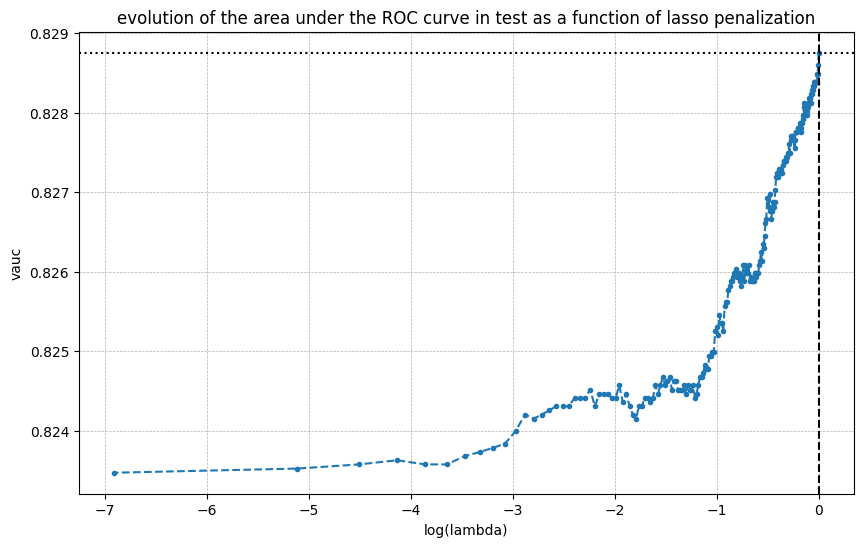

In [26]:
plt.figure(figsize=(10, 6))
# Plot vauc vs. log(lambda_seq) using dashed line and filled circle markers (similar to pch=16, cex=0.5)
plt.plot(np.log(lambda_seq), vauc, linestyle='--', marker='o', markersize=3)
# Identify the index of the maximum vauc value
best_idx = np.argmax(vauc)
# Add a vertical line at log(lambda_seq[best_idx])
plt.axvline(np.log(lambda_seq[best_idx]), color='black', linestyle='--')
# Add a horizontal line at the maximum vauc value
plt.axhline(vauc[best_idx], color='black', linestyle=':')
plt.title("evolution of the area under the ROC curve in test as a function of lasso penalization")
plt.xlabel("log(lambda)")
plt.ylabel("vauc")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

We find a maximum value for the aure under the ROC curve in testing of 0.828, whose position is clearly visible in the figure below. This area is of course smaller than that obtained by cross-validation, and corresponds to greater penalization.

Here's the corresponding penalization.

In [27]:
best_lambda = lambda_seq[np.argmax(vauc)]
print("Chosen lambda:", best_lambda)

Chosen lambda: 1.0


In [28]:
log_lambda_max = np.log(lambda_seq[np.argmax(vauc)])
print("log(lambda) at maximum vauc:", log_lambda_max)

log(lambda) at maximum vauc: 0.0


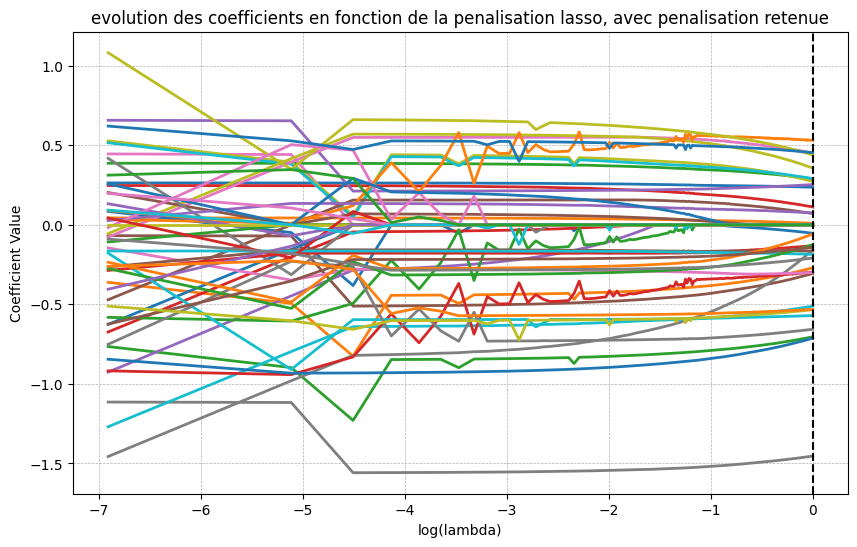

In [35]:
# Plot the coefficient paths versus log(lambda)
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[0]):
    plt.plot(np.log(lambda_seq), coefs[i, :], lw=2)
plt.xlabel("log(lambda)")
plt.ylabel("Coefficient Value")
plt.title("evolution des coefficients en fonction de la penalisation lasso, avec penalisation retenue")
# Draw a vertical line at log(lambda) corresponding to the maximum vauc value
plt.axvline(np.log(lambda_seq[np.argmax(vauc)]), color='black', linestyle='--')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

We represent the evolution of coef as a function of penalization, indicating by a dotted line the position of the penalization leading to the maximum area under the ROC curve on the test sample. 

In [36]:
from sklearn.metrics import roc_curve
import numpy as np

# Compute ROC curve using the predicted probabilities for the best candidate
# Assuming ytpred contains the probabilities for the candidate with maximum vauc.
fpr, tpr, _ = roc_curve(yt, ytpred, pos_label=1)

# Compute the maximum difference between TPR and FPR
max_diff = np.max(tpr - fpr)
print(max_diff)

0.5604096989966555


It's a little surprising that it exceeds the Kolmogorov-Smirnov distance of the ridge model previously obtained (0.432), whose area under the ROC curve is higher, but it should be remembered that the Kolmogorov-Smirnov distance is a measure obtained for a score threshold, and probably doesn't have the relevance of a global measure like the area under the ROC curve.

Finally, we calculate the coefficients of the lasso model used

In [37]:
# Get the best lambda and compute corresponding C value
best_lambda = lambda_seq[np.argmax(vauc)]
best_C = 1.0 / best_lambda

# Refit the model with the best penalty
best_model = LogisticRegression(penalty='l1', solver='liblinear', 
                                C=best_C, max_iter=10000)
best_model.fit(x, y)

# Print the intercept and coefficients
print("Intercept:", best_model.intercept_)
print("Coefficients:", best_model.coef_)

Intercept: [0.]
Coefficients: [[ 0.23644641  0.00957503  0.28815766  0.11229425  0.25284729 -0.30656757
   0.         -1.45352198  0.27312162  0.29057873  0.         -0.27000315
  -0.70365816  0.          0.          0.07111308  0.45166064 -0.1571306
   0.35656368 -0.51116436 -0.05294894  0.53147496  0.         -0.2966439
   0.          0.         -0.30021222  0.          0.43953293 -0.57052401
  -0.71266255  0.          0.         -0.13126647  0.07418248 -0.16472695
   0.         -0.65628771  0.         -0.1856439   0.         -0.05806176
  -0.12477113  0.          0.         -0.14117502  0.         -0.20896764
  -0.53334713  0.          0.45335734 -0.53212833  0.        ]]


We note that only two coef are zero. 

In [45]:
import numpy as np

# Count the nonzero coefficients for each lambda candidate.
# In our "coefs" array the intercept is not included, so this count is equivalent
coefn0 = np.count_nonzero(coefs, axis=0)

# Combine the nonzero counts and vauc side by side.
lasso = np.column_stack((coefn0, vauc))

In [46]:
pd.DataFrame(lasso).head()

,0,1
0,35.0,0.828752
1,35.0,0.828595
2,35.0,0.828491
3,35.0,0.828386
4,35.0,0.828491


In [47]:
pd.DataFrame(lasso).tail()

,0,1
195,41.0,0.823579
196,41.0,0.823631
197,45.0,0.823579
198,46.0,0.823526
199,52.0,0.823474


We then calculate the area under the maximum ROC curve reached for each value of the number of non-zero coef

In [49]:
lasso_df = pd.DataFrame(lasso, columns=["coefn0", "vauc"])
agg_result = lasso_df.groupby("coefn0")["vauc"].max().reset_index()
print(agg_result)

   coefn0      vauc
0    35.0  0.828752
1    36.0  0.826087
2    37.0  0.825982
3    38.0  0.824571
4    39.0  0.824571
5    40.0  0.824415
6    41.0  0.823631
7    45.0  0.823579
8    46.0  0.823526
9    52.0  0.823474


We can see that the area under the ROC curve dilutes rapidly with the number of non-zero coef, with :
- AUC in test = 0.774 with 21 non-zero coef
- AUC in test = 0.767 with 18 non-zero coef
- AUC in test = 0.737 with 15 non-zero coef

## Non-consistency of lasso estimator

## Lasso détendu, lasso adaptatif et SCAD

In [52]:
# Create design matrices for train and test
x = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=False)
y = train["presence_unpaid"]

xt = pd.get_dummies(test.drop(columns=["presence_unpaid"]), drop_first=False)
yt = test["presence_unpaid"]

# Align the test design matrix with the training one in case of missing levels
xt = xt.reindex(columns=x.columns, fill_value=0)

In [61]:
import numpy as np

import statsmodels.api as sm

# Fit the OLS model (x and y are already defined, and x should not include the intercept)
X = sm.add_constant(x.astype(float))
ols_model = sm.OLS(y, X).fit()

# Exclude the intercept coefficient
beta_ols = ols_model.params[1:]

# Compute elementwise penalization: max(1, 1/abs(beta))
penal = np.maximum(1, 1 / np.abs(beta_ols))
print(penal)

effort_rate                                         27.673800
home_old                                           185.173387
nb_credits                                          18.504499
nb_of_dependants                                    34.904482
accounts_CC < 0 euros                                7.888308
accounts_CC > 200 euros                             40.092374
accounts_CC [0-200 euros]                           13.670072
accounts_No account                                  6.632418
history_credit_A30                                   8.937907
history_credit_A31                                   8.856092
history_credit_A32                                 163.337435
history_credit_A33                                  13.330902
history_credit_A34                                   8.371127
object_credit_Business                              77.313817
object_credit_Education                             17.760748
object_credit_Interior                              28.300333
object_c

We see that the constant's coef is indeed 1, and that the other coef's are all > 1. 

In [63]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Supposons que x, y, xt, yt sont déjà définis comme des arrays NumPy
# x et y : matrice de design et cible pour l'entraînement
# xt et yt : matrice de design et cible pour le test

# Supposons également que vous avez un tableau 'lambdas' provenant d'une validation croisée,
# avec lambdas[0] la valeur maximale et lambdas[-1] la valeur minimale.
# Si ce n'est pas le cas, vous pouvez définir une séquence par exemple comme suit :
# lambdas = np.linspace(1.0, 0.001, 100)
# (Remplacez cette ligne par votre séquence de lambda si elle est disponible)
lambdas = np.linspace(1.0, 0.001, 100)  

# Créer une séquence de lambda sur 100 valeurs (vous pouvez augmenter num si souhaité)
lam_seq = np.linspace(lambdas[0], lambdas[-1], num=100)

# Dans scikit-learn, le paramètre de régularisation est C = 1 / lambda
C_seq = 1.0 / lam_seq

auc_values = []
models = []

# Boucler sur chaque valeur de C
for C in C_seq:
    clf = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=10000)
    clf.fit(x, y)
    # Prédire les probabilités sur l'ensemble test
    y_pred = clf.predict_proba(xt)[:, 1]
    auc = roc_auc_score(yt, y_pred)
    auc_values.append(auc)
    models.append(clf)

auc_values = np.array(auc_values)
best_index = np.argmax(auc_values)
best_auc = auc_values[best_index]
best_lambda = lam_seq[best_index]

print("Best lambda:", best_lambda)
print("Best AUC:", best_auc)


Best lambda: 1.0
Best AUC: 0.8287520903010034


In [64]:
# The best model has been fitted in a previous cell (best_model)
print("Intercept:", best_model.intercept_)
print("Coefficients:", best_model.coef_)

Intercept: [0.]
Coefficients: [[ 0.23644641  0.00957503  0.28815766  0.11229425  0.25284729 -0.30656757
   0.         -1.45352198  0.27312162  0.29057873  0.         -0.27000315
  -0.70365816  0.          0.          0.07111308  0.45166064 -0.1571306
   0.35656368 -0.51116436 -0.05294894  0.53147496  0.         -0.2966439
   0.          0.         -0.30021222  0.          0.43953293 -0.57052401
  -0.71266255  0.          0.         -0.13126647  0.07418248 -0.16472695
   0.         -0.65628771  0.         -0.1856439   0.         -0.05806176
  -0.12477113  0.          0.         -0.14117502  0.         -0.20896764
  -0.53334713  0.          0.45335734 -0.53212833  0.        ]]


In the book, we note that the area under the maximum ROC curve in test of the adaptive lasso is much lower, at 0.761, than that of the ordinary lasso, but we can attribute this to the abnormally high coef values of certain variables, notably the credit object, which in turn comes from insufficient penalization of these variables.

In [65]:
print("Beta OLS coefficients:")
print(beta_ols)

Beta OLS coefficients:
effort_rate                                        0.036135
home_old                                           0.005400
nb_credits                                         0.054041
nb_of_dependants                                   0.028650
accounts_CC < 0 euros                              0.126770
accounts_CC > 200 euros                           -0.024942
accounts_CC [0-200 euros]                          0.073153
accounts_No account                               -0.150775
history_credit_A30                                 0.111883
history_credit_A31                                 0.112917
history_credit_A32                                -0.006122
history_credit_A33                                -0.075014
history_credit_A34                                -0.119458
object_credit_Business                             0.012934
object_credit_Education                           -0.056304
object_credit_Interior                             0.035335
object_credit_New

## The Lasso group

Recall that in lasso logistic regression, we look for the coef $ \beta_j $
that on the data $ (x^i_j, y^i) $
minimize the expression : 

$$  -2\sum^n_{i=1}~\Bigg[y^i~log\Bigg(\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg) + (1-y^i)~log\Bigg(1-\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg)\Bigg]+\lambda\sum^p_{j=1}\beta^2_j$$

In the “group lasso” variant, the variables are not considered independently of each other, but are divided into G disjoint groups. The penalization term is then replaced by a $$ \lambda\sum^G_g=1\sqrt P_g\parallel\beta_g\parallel_2 $$ term.


where $\lambda$ is the penalization parameter > 0, $P_g$ is the weight (number of variables) of the $g^th$ group, and $\parallel\beta_g\parallel_2$ is the Euclidean norm of the coef vector of the $g^th$ group. It is indeed the norm 



$$ \parallel\beta_g\parallel_2 = \sqrt{\sum_{g_i} \vert \beta_{g_i} \vert^2} $$

which must cancel out for more and more $g$ as $\lambda$ becomes larger and larger. 

We can also combine lasso and group lasso in a “sparse group lasso” with a penalization of the form :

$$  (1-\alpha)\lambda\sum^G_{g=1}\sqrt {P_g}\parallel\beta_g\parallel_2+\alpha\lambda\parallel\beta\parallel_1 $$

In [121]:
import numpy as np
import pandas as pd
from group_lasso import GroupLasso

# On suppose que 'credit2' est déjà défini comme DataFrame avec les colonnes attendues.

# Créer une copie de credit2 et ajuster la variable cible.
credit3 = credit2.copy()

# Si la colonne "id" existe, l'utiliser comme index.
if "id" in credit3.columns:
    credit3.set_index("id", inplace=True)

# Vérifier que la colonne "presence_unpaid" existe, sinon lever une erreur.
if "presence_unpaid" not in credit3.columns:
    raise KeyError("La colonne 'presence_unpaid' n'existe pas dans credit2.")

# Créer la colonne "presence_impaye" en soustrayant 1 à "presence_unpaid"
credit3["presence_impaye"] = credit3["presence_unpaid"] - 1

# Utiliser l'index actuel et toutes les colonnes pour créer un sous-ensemble.
idx = credit3.index
cols = list(credit3.columns)

data_subset = credit3.loc[idx, cols]
y = data_subset["presence_impaye"]
X = data_subset.drop("presence_impaye", axis=1)

# Convertir les variables catégorielles en variables indicatrices (dummy encoding)
X = pd.get_dummies(X, drop_first=False)

# Vérifier la forme des données
print("X shape:", X.shape)
print("y shape:", y.shape)

# Définir les groupes : ici, chaque colonne de X est dans son propre groupe.
groups = np.arange(X.shape[1])

# Créer une séquence de lambda similaire à R: seq(100, 1, length=1000)
lambdas = np.linspace(100, 1, 1000)
current_lambda = lambdas[0]

model = GroupLasso(
    groups=groups,
    group_reg=current_lambda,  # équivalent à lambda en R
    l1_reg=0,                  # ajuster si besoin d'une pénalisation L1 supplémentaire
    fit_intercept=True,
    tol=1e-3,
    random_state=42
)

# Entraîner le modèle avec X et y
model.fit(X.values, y.values)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


X shape: (1000, 54)
y shape: (1000,)
Intercept: [-0.70154611]
Coefficients: [[ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]]


/var/data/python/lib/python3.12/site-packages/group_lasso/_group_lasso.py:457: UserWarning: 
The behaviour has changed since v1.1.1, before then, a bug in the optimisation
algorithm made it so the regularisation parameter was scaled by the largest
eigenvalue of the covariance matrix.

To use the old behaviour, initialise the class with the keyword argument
`old_regularisation=True`.

To supress this warning, initialise the class with the keyword argument
`supress_warning=True`

  warnings.warn(_OLD_REG_WARNING)


In [131]:
# Supposons que 'coe' est un DataFrame de coefficients,
# avec les lignes portant les noms des variables et les colonnes correspondant aux différentes valeurs de lambda.
# Par exemple, coe = pd.DataFrame(data=..., index=feature_names, columns=lambda_names)
# Et supposons que 'lambdas' est un tableau de valeurs de lambda,
# de longueur n, dans le même ordre que les colonnes de coe.

coe = pd.DataFrame(coefs, index=x.columns)


def modannul(i):
    """
    Renvoie la liste triée des noms de variables dont le coefficient en colonne i de 'coe' est non nul.
    """
    # coe.iloc[:, i] est une Series avec l'indice correspondant aux noms des variables.
    return sorted(coe.index[coe.iloc[:, i] != 0])

# Supposons que n est le nombre de colonnes de la DataFrame de coefficients.
n = coe.shape[1]

# Parcourir les colonnes dans l'ordre inverse de Python (correspondant à R: for (j in (length(lambda)-1):1))
# En Python, en supposant que la première colonne de coe correspond à l'indice 0, 
# nous parcourons j allant de n-2 jusqu'à 0 (ce qui correspond à R: j = n-1, n-2, ..., 1)
for j in range(n - 2, -1, -1):
    mod_j = modannul(j)
    mod_j1 = modannul(j + 1)
    if len(mod_j) < len(mod_j1):
        # Calculer la différence : les variables présentes dans mod_j1 mais pas dans mod_j.
        new_features = sorted(set(mod_j1) - set(mod_j))
        print(f"Lambda index {j}: nouvelles variables ajoutées : {new_features}")


Lambda index 198: nouvelles variables ajoutées : ['duration_credit_[15.0, 36.0)', 'employment_old_between 1 and 4 years', 'guarantees_Without guarantor', 'job_type_A171', 'object_credit_Interior', 'property_No property']
Lambda index 197: nouvelles variables ajoutées : ['accounts_CC [0-200 euros]', 'employment_old_Unemployed or < 1 year', 'family_status_Female divorced/separated/married', 'object_credit_Video-HIFI', 'telephone_A191']
Lambda index 196: nouvelles variables ajoutées : ['age_[0.0, 25.0)', 'duration_credit_[15.0, 36.0)', 'history_credit_A32', 'job_type_A174']
Lambda index 193: nouvelles variables ajoutées : ['amount_credit_[4000.0, inf)', 'other_credits_External credits']
Lambda index 190: nouvelles variables ajoutées : ['duration_credit_[15.0, 36.0)']
Lambda index 187: nouvelles variables ajoutées : ['duration_credit_[15.0, 36.0)']
Lambda index 184: nouvelles variables ajoutées : ['family_status_Female divorced/separated/married']
Lambda index 179: nouvelles variables ajou

In the book, we observe that, as expected, all modalities of a variable are eliminated simultaneously. The first two variables to be eliminated are length of residence and number of dependants, which is consistent with the very weak link measured between these variables and the existence of unpaid debts. Next, job type is eliminated. The order in which the variables are eliminated is as expected. As for the discretizations of credit duration and age, it is the initial discretizations that are favored by the lasso group.

In [136]:
import numpy as np
import pandas as pd
from group_lasso import GroupLasso

# On suppose que 'credit2' est déjà défini comme DataFrame avec les colonnes attendues.

# Créer une copie de credit2 et ajuster la variable cible.
credit3 = credit2.copy()

# Si la colonne "id" existe, l'utiliser comme index.
if "id" in credit3.columns:
    credit3.set_index("id", inplace=True)

# Vérifier que la colonne "presence_unpaid" existe
if "presence_unpaid" not in credit3.columns:
    raise KeyError("La colonne 'presence_unpaid' n'existe pas dans credit2.")

# Créer la variable cible "presence_impaye"
credit3["presence_impaye"] = credit3["presence_unpaid"] - 1

# Création du sous-ensemble : toutes les lignes et toutes les colonnes
data_subset = credit3.copy()
y = data_subset["presence_impaye"]
X = data_subset.drop("presence_impaye", axis=1)

# IMPORTANT : Convertir X en variables numériques via pd.get_dummies pour obtenir la matrice de design.
X = pd.get_dummies(X, drop_first=False)
print("X shape after get_dummies:", X.shape)

# Définir les groupes : ici, chaque colonne est assignée à son propre groupe.
# On s'assure que la longueur de groups est égale à X.shape[1]
groups = np.arange(X.shape[1])
print("Groups shape:", groups.shape)  # Doit être (nombre de features,)

# Créer une séquence de lambda de 100 à 1 sur 1000 valeurs
lambdas = np.linspace(100, 1, 1000)

# Pour la démonstration, on utilise une valeur de lambda unique (par exemple, le premier élément)
current_lambda = lambdas[0]

# Créer et configurer le modèle GroupLasso
model = GroupLasso(
    groups=groups,
    group_reg=current_lambda,  # équivalent à lambda en R
    l1_reg=0,                  # ajuster si besoin d'une pénalisation L1 supplémentaire
    fit_intercept=True,
    tol=1e-3,
    random_state=42
)

# Entraîner le modèle sur les données
model.fit(X.values, y.values)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


X shape after get_dummies: (1000, 54)
Groups shape: (54,)
Intercept: [-0.70154611]
Coefficients: [[ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]]


/var/data/python/lib/python3.12/site-packages/group_lasso/_group_lasso.py:457: UserWarning: 
The behaviour has changed since v1.1.1, before then, a bug in the optimisation
algorithm made it so the regularisation parameter was scaled by the largest
eigenvalue of the covariance matrix.

To use the old behaviour, initialise the class with the keyword argument
`old_regularisation=True`.

To supress this warning, initialise the class with the keyword argument
`supress_warning=True`

  warnings.warn(_OLD_REG_WARNING)


## Elastic Net Penalization

Allows us to both narrow certain coef (the aim of ridge regression) and cancel out others (the aim of lasso regression). We'll see if net elastic gives us better discriminating power by calculating the area under the ROV curve on the test sample for several alpha values between 0 (ridge model) and 1 (lasso model) in the formula below: 

$$  \alpha\Bigg[(1-\alpha)\sum_j\beta^2_j+\alpha\sum_j|\beta_j|\Bigg]  $$

We vary alpha with a step of 0.1, and for each value of alpha, the area under the ROC curve is the maximum value obtained by varying lambda as before.
We apply the modality groupings to the variables and remove the least discriminating variables, those with the lowest Cramer's V with the variable to be explained.

In [137]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score

def elastic(a):
    # Set seed for reproducibility
    np.random.seed(235)
    
    # Run cross-validation to get candidate C values.
    # In sklearn, C = 1 / lambda.
    cv_model = LogisticRegressionCV(
        Cs=100,
        penalty='elasticnet',
        solver='saga',
        l1_ratio=a,
        scoring='roc_auc',
        cv=5,
        max_iter=10000,
        refit=True
    ).fit(x, y)
    
    candidate_Cs = cv_model.Cs_
    candidate_lambdas = 1.0 / candidate_Cs  # Convert Cs to lambdas
    lambda_max = candidate_lambdas[0]
    lambda_min = candidate_lambdas[-1]
    
    # Generate a sequence of 10,000 lambda values from lambda_max down to lambda_min.
    lam_seq = np.linspace(lambda_max, lambda_min, 10000)
    
    aucs = []
    for lam in lam_seq:
        # Convert lambda back to C (avoid division by zero)
        C = 1.0/lam if lam != 0 else 1e12
        model = LogisticRegression(
            penalty='elasticnet',
            solver='saga',
            l1_ratio=a,
            C=C,
            max_iter=10000
        )
        model.fit(x, y)
        ytpred = model.predict_proba(xt)[:, 1]
        auc = roc_auc_score(yt, ytpred)
        aucs.append(auc)
    
    aucs = np.array(aucs)
    return aucs.max()

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def elastic(a):
    """
    Ajuste un modèle de régression logistique avec pénalité élastique (alpha = a),
    en faisant varier la pénalisation lambda sur un maillage, et retourne la meilleure AUC obtenue.
    
    Paramètres:
      a : float
          Le paramètre de mélange de l'elastic net (1 = Lasso, 0 = Ridge).
    
    Hypothèses:
      - x, y, xt, yt sont définis globalement comme des arrays NumPy.
        x, y : données d'entraînement (X et cible)
        xt, yt : données de test (X et cible)
    
    Retourne:
      best_auc : float
          La meilleure valeur d'AUC obtenue sur le maillage.
    """
    # Reproduire set.seed(235)
    np.random.seed(235)
    
    # Définir une séquence de lambda (ici de 100 à 1, sur 10 000 points)
    lambdas = np.linspace(100, 1, 10000)
    # En scikit-learn, le paramètre de régularisation est C = 1/lambda
    C_seq = 1.0 / lambdas
    
    auc_values = []
    
    # Utiliser les variables globales x, y (train) et xt, yt (test) correctement définies
    # x et y sont définis à partir de train (700 échantillons)
    # xt et yt sont définis à partir de test (300 échantillons)
    
    for C in C_seq:
        clf = LogisticRegression(
            penalty='elasticnet',
            solver='saga',       # nécessaire pour elasticnet
            l1_ratio=a,          # fixe le mélange L1/L2
            C=C,
            max_iter=10000,
            random_state=235     # pour reproduire la seed
        )
        clf.fit(x, y)  # x, y sont les données d'entraînement (700 échantillons)
        # Prédiction des probabilités pour la classe positive sur test
        y_pred = clf.predict_proba(xt)[:, 1]  # xt est le test set (300 échantillons)
        auc = roc_auc_score(yt, y_pred)
        auc_values.append(auc)
    
    auc_values = np.array(auc_values)
    best_auc = auc_values[np.argmax(auc_values)]
    return best_auc

In [ ]:
# Recréer les variables x, y (train) et xt, yt (test) avec les bonnes dimensions
# IMPORTANT: x et y doivent venir de train (700 échantillons), pas de credit2 (1000)

# Variables d'entraînement (700 échantillons)
x = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=False)
y = train["presence_unpaid"]

# Variables de test (300 échantillons)
xt = pd.get_dummies(test.drop(columns=["presence_unpaid"]), drop_first=False)
yt = test["presence_unpaid"]

# Aligner les colonnes du test avec celles du train
xt = xt.reindex(columns=x.columns, fill_value=0)

print(f"Train: x shape = {x.shape}, y shape = {y.shape}")
print(f"Test: xt shape = {xt.shape}, yt shape = {yt.shape}")

# Appel de la fonction elastic avec alpha=0.9
best_auc = elastic(0.9)
print("Best AUC for elastic net with alpha=0.9:", best_auc)

In the book, we find the previous values for lasso and ridge regression, and note that the area under the ROC curve for ridge regression is not exceeded. In fact, this area quickly approaches that of the lasso. 